# ConceptQuery Demo

In [1]:
from concept_query import GraphSearch
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import time

In [2]:
# Create graph search client
client = GraphSearch()

## Get networkx graph

In [3]:
start = time.time()
query = 'tensorflow'
gr = client.get_result(query)
print(f'Elapsed time: {time.time() - start} seconds')

Elapsed time: 2.7912631034851074 seconds


In [4]:
scores = []
for node, attr in gr.nodes(data=True):
    scores.append((node, attr['weight']))

In [5]:
sorted_nodes = sorted(scores, key=lambda x: x[1], reverse=True)
for node, weight in sorted_nodes:
    print(node, weight)

deep-learning 3.4629579924682434
python 3.31951543242455
software 3.0412907798951374
network 2.993415507640905
neural-network 2.7887638567640067
model 2.49616071824994
google 2.4919515492899182
machine-learning 1.9880037982748064
keras 1.5494056988736704
application 1.5443466186775987
silicon 1.1335420356969497
cpu 1.115990889961953
cloud 1.0232858270109202
tensor 1.019919364718962
tensorflow 1.0
community 0.9806820631377564
code 0.8914019790952711
gpus 0.826991507838489
ecosystem 0.7869411921250584
cnn 0.7779163160157005
gpu 0.7627759287613376
server 0.6887845489654669
utensor 0.6372551038659798
example 0.6325624197718694
device 0.6312087146360484
algorithm 0.6136895555950934
tensorflow-processing-unit 0.5526696974229653
dataset 0.547718929053534
desktop 0.500934061698781
question 0.4889524674212466
source 0.48296750583337855
training 0.48148409139883364
tensorboard 0.47294696151842075
topic 0.45916817542644606
form 0.4573948040592811
regression 0.4505301414746943
flag 0.4396730279110

## Draw Graph

C:\Users\19196\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\19196\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


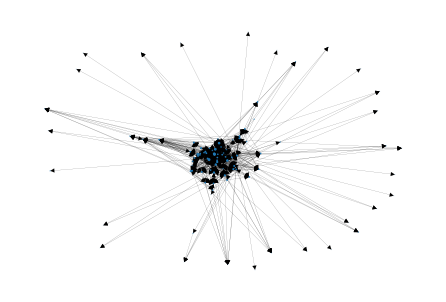

In [6]:
nx.draw_spring(gr, width=0.1, node_size=[gr.nodes[n]['weight'] for n in gr.nodes])

### Prune Graph

Repeatedly remove nodes that don't have outbound edges.

In [13]:
G = gr
continue_pruning = True
step = 1

while continue_pruning:
    any_inbound_only = False
    
    # Get nodes
    display_nodes = []
    for node in G.nodes:
        if G.out_degree(node) > 0:
            display_nodes.append(node)
        else:
            any_inbound_only = True

    # Get edges
    display_edges = []
    for u,v,attr in G.edges(data=True):
        if u in display_nodes and v in display_nodes:
            display_edges.append((u,v,attr))
            
    G_new = nx.DiGraph()
    for node in display_nodes:
        G_new.add_node(node, weight=G.nodes[node]['weight'])
    G_new.add_edges_from(display_edges)
    
    continue_pruning = any_inbound_only
    G = G_new
    
    print('Step:', step)
    step += 1
    
print('Original graph:', len(gr.nodes))
print('Pruned graph:', len(G.nodes))

Step: 1
Step: 2
Step: 3
Original graph: 94
Pruned graph: 64


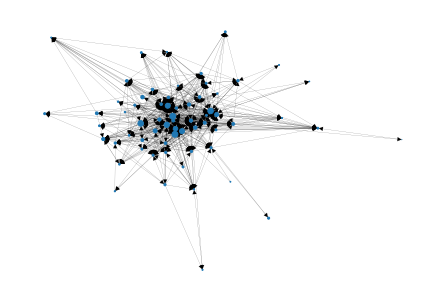

In [14]:
nx.draw_spring(G, width=0.1, node_size=[gr.nodes[n]['weight']*10 for n in G.nodes])

In [15]:
G.nodes

NodeView(('.net', 'core', 'flag', 'graph', 'histogram', 'repository', 'code', 'linux', 'version', 'instruction', 'python', 'c++', 'desktop', 'ecosystem', 'gaming', 'review', 'algorithm', 'regression', 'runtime', 'dataset', 'silicon', 'model', 'ngraph', 'software', 'cpu', 'source', 'backend', 'inference', 'gpu', 'image', 'tf', 'example', 'training', 'deep-learning', 'gpus', 'space', 'device', 'storage', 'machine-learning', 'form', 'application', 'trip', 'user', 'server', 'network', 'google', 'question', 'tpu', 'lingvo', 'community', 'tensorflow-processing-unit', 'tf.keras', 'keras', 'ml.net', 'deep', 'utensor', 'topic', 'neural-network', 'cnn', 'mcu', 'cloud', 'tensor', 'tensorboard', 'tensorflow'))

## Pickle Graphs

In [36]:
# Write
with open('tensorflow-networkx','wb') as f:
    pickle.dump(G, f)

In [20]:
# Read
with open('tensorflow-networkx','rb') as f:
    gr = pickle.load(f)